# Project P77: Document Classification

## Business objective- The document classification solution should significantly reduce the manual human effort in the HRM and financial department. It should achieve a higher level of accuracy and automation with minimal human intervention

### Sample Data Set Details: Resumes and financial documents

In [1]:
# !pip install tika
# !pip install docxpy

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
from os.path import splitext
import os
import re
import nltk
import pandas as pd
import numpy as np
import docxpy
from tika import parser
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
def splitext_(path):
    if len(path.split('.')) > 2:
        return path.split('.')[0],'.'.join(path.split('.')[-2:])
    return splitext(path)

def text_preprocess(text):
    cleaned_text =  re.sub(r"[^a-zA-Z0-9]", ' ', text)  
    return cleaned_text

# extracting text from pdf file

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    try:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,\
                                  caching=caching, check_extractable=True):
            interpreter.process_page(page)
    except:
        print('This pdf won\'t allow text extraction!')        
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()
    return str
 

extracted = []    

# Based on the extension of file, extracting text

for foldername,subfolders,files in os.walk(r'C:\Users\DIKSHA\Documents\Resumes'):
    for file_ in files:
        dict_ = {}
        file_name,extension = splitext_(file_)
        if extension == '.pdf':
            converted = convert_pdf_to_txt(foldername +'/'+ file_)
            converted = text_preprocess(converted)
            dict_['Label'] = file_name
            dict_['Extracted'] = converted
            extracted.append(dict_)
            
        elif extension == '.docx':
            doc = docxpy.process(foldername +'/'+ file_)
            doc = text_preprocess(doc)
            dict_['Label'] = file_name
            dict_['Extracted'] = doc
            extracted.append(dict_)
            
        elif extension == '.ppt':
            parsed = parser.from_file(foldername +'/'+ file_)
            ppt = parsed["content"]
            ppt = text_preprocess(ppt)
            dict_['Label'] = file_name
            dict_['Extracted'] = ppt
            extracted.append(dict_)   
        
            
        df =  pd.DataFrame(extracted)
        print(df)
        df.to_csv('labelled_data.csv')

        Label                                          Extracted
0  Anil kumar  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...
                   Label                                          Extracted
0             Anil kumar  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...
1  AradhanaTripathi[4_0]  Aradhana Tripathi    Current Location  Gachibo...
                   Label                                          Extracted
0             Anil kumar  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...
1  AradhanaTripathi[4_0]  Aradhana Tripathi    Current Location  Gachibo...
2           Buddha Vamsi  BUDDHA VAMSI                                  ...
                         Label  \
0                   Anil kumar   
1        AradhanaTripathi[4_0]   
2                 Buddha Vamsi   
3  ChinnaSubbarayuduM_Hexaware   

                                           Extracted  
0  ANIL KUMAR MADDUKURI      SQL   MSBI Developer...  
1  Aradhana Tripathi    Current Location  Gachibo...  
2 

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   

                                            Extracted  
0   ANIL KUMAR MADDUKURI      SQL   MSBI Developer...  
1   Aradhana Tripathi    Current Location  Gachibo...  
2   BUDDHA VAMSI                                  ...  
3   Chinna Subbarayudu M  DOB  06th March 1994  Na...  
4   Name           Gopi Krishna Reddy             ...  
5   G Himaja                           

14  Classification  Internal  Classification  Inte...  
                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   

                                            Extracted  
0  

17  PeopleSoft Administration     Vivekanand Sayan...  
                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17      

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17              PeopleSoft DBA_Vivekanand Sayana   
18          

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17              PeopleSoft DBA_Vivekanand Sayana   
18          

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17              PeopleSoft DBA_Vivekanand Sayana   
18          

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17              PeopleSoft DBA_Vivekanand Sayana   
18          

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17              PeopleSoft DBA_Vivekanand Sayana   
18          

                                           Label  \
0                                     Anil kumar   
1                          AradhanaTripathi[4_0]   
2                                   Buddha Vamsi   
3                    ChinnaSubbarayuduM_Hexaware   
4                          Gopi Krishna_Hexaware   
5                            Himaja G_(Hexaware)   
6    Internship_Ravali_Musquare Technologies (1)   
7   Internship_Susovan Bag_Musquare Technologies   
8                             Jyotiverma_Heaware   
9                                kamballapradeep   
10                 MooraboyinaGuravaiah_Hexaware   
11                                 Neeraj Mishra   
12                     P V Sai Krishna_ Hexaware   
13                 Peoplesoft Admin_AnubhavSingh   
14                       Peoplesoft Admin_Murali   
15           Peoplesoft Admin_SirazuddinMohammad   
16                Peoplesoft Admin_Varkala Vikas   
17              PeopleSoft DBA_Vivekanand Sayana   
18          

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

                                                Label  \
0                                          Anil kumar   
1                               AradhanaTripathi[4_0]   
2                                        Buddha Vamsi   
3                         ChinnaSubbarayuduM_Hexaware   
4                               Gopi Krishna_Hexaware   
5                                 Himaja G_(Hexaware)   
6         Internship_Ravali_Musquare Technologies (1)   
7        Internship_Susovan Bag_Musquare Technologies   
8                                  Jyotiverma_Heaware   
9                                     kamballapradeep   
10                      MooraboyinaGuravaiah_Hexaware   
11                                      Neeraj Mishra   
12                          P V Sai Krishna_ Hexaware   
13                      Peoplesoft Admin_AnubhavSingh   
14                            Peoplesoft Admin_Murali   
15                Peoplesoft Admin_SirazuddinMohammad   
16                     Peopleso

In [5]:
df.shape

(53, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      53 non-null     object
 1   Extracted  53 non-null     object
dtypes: object(2)
memory usage: 976.0+ bytes


In [7]:
df.isnull().sum()

Label        0
Extracted    0
dtype: int64

In [8]:
print (df['Label'].value_counts())

Internship_Ravali_Musquare Technologies (1)                     1
Vinod B                                                         1
premsai                                                         1
Buddha Vamsi                                                    1
React Developer_Naveen sadhu                                    1
Internship_Susovan Bag_Musquare Technologies                    1
Peoplesoft Admin_AnubhavSingh                                   1
RameshP_Hexaware                                                1
Reactjs Developer_M Lokesh Babu_Musquare Technologies           1
ChinnaSubbarayuduM_Hexaware                                     1
Reactjs Developer_M Lokesh                                      1
Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies      1
React Developer_Haripriya                                       1
RameshNataru[3_4]                                               1
Peoplesoft FSCM_PriyabrataHota                                  1
Peoplesoft

In [12]:
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#     text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [14]:
df.head()

,Label,Extracted
0,Anil kumar,ANIL KUMAR MADDUKURI SQL MSBI Developer...
1,AradhanaTripathi[4_0],Aradhana Tripathi Current Location Gachibo...
2,Buddha Vamsi,BUDDHA VAMSI ...
3,ChinnaSubbarayuduM_Hexaware,Chinna Subbarayudu M DOB 06th March 1994 Na...
4,Gopi Krishna_Hexaware,Name Gopi Krishna Reddy ...


In [42]:
def get_split(text1):
    l_total = []
    l_parcial = []
    if len(text1.split())//150 >0:
        n = len(text1.split())//150
    else: 
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text1.split()[:200]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text1.split()[w*150:w*150 + 200]
            l_total.append(" ".join(l_parcial))
    return l_total

In [44]:
df['text_split'] = df['Extracted'].apply(get_split)
df.head()

,Label,Extracted,text_split,Extracted_split
0,Anil kumar,ANIL KUMAR MADDUKURI SQL MSBI Developer...,[ANIL KUMAR MADDUKURI SQL MSBI Developer Summa...,[ANIL KUMAR MADDUKURI SQL MSBI Developer Summa...
1,AradhanaTripathi[4_0],Aradhana Tripathi Current Location Gachibo...,[Aradhana Tripathi Current Location Gachibowli...,[Aradhana Tripathi Current Location Gachibowli...
2,Buddha Vamsi,BUDDHA VAMSI ...,[BUDDHA VAMSI CAREER OBJECTIVE Have 2 11 years...,[BUDDHA VAMSI CAREER OBJECTIVE Have 2 11 years...
3,ChinnaSubbarayuduM_Hexaware,Chinna Subbarayudu M DOB 06th March 1994 Na...,[Chinna Subbarayudu M DOB 06th March 1994 Nati...,[Chinna Subbarayudu M DOB 06th March 1994 Nati...
4,Gopi Krishna_Hexaware,Name Gopi Krishna Reddy ...,[Name Gopi Krishna Reddy PROFESSIONAL SUMMERY ...,[Name Gopi Krishna Reddy PROFESSIONAL SUMMERY ...


In [45]:
df.reset_index(drop=True, inplace=True)
df.head(2)

,Label,Extracted,text_split,Extracted_split
0,Anil kumar,ANIL KUMAR MADDUKURI SQL MSBI Developer...,[ANIL KUMAR MADDUKURI SQL MSBI Developer Summa...,[ANIL KUMAR MADDUKURI SQL MSBI Developer Summa...
1,AradhanaTripathi[4_0],Aradhana Tripathi Current Location Gachibo...,[Aradhana Tripathi Current Location Gachibowli...,[Aradhana Tripathi Current Location Gachibowli...


In [46]:
df.shape

(53, 4)

In [48]:
train_l = []
Category_l = []
index_l =[]
for idx,row in df.iterrows():
    for l in row['text_split']:
        train_l.append(l)
        Category_l.append(row['Extracted'])
        index_l.append(idx)
len(train_l),len(Category_l), len(index_l)

(189, 189, 189)

In [51]:
df = pd.DataFrame({'Label':train_l, 'Extracted':Category_l})
df.head()

,Label,Extracted
0,ANIL KUMAR MADDUKURI SQL MSBI Developer Summar...,ANIL KUMAR MADDUKURI SQL MSBI Developer...
1,multiple source file to Database tables Expert...,ANIL KUMAR MADDUKURI SQL MSBI Developer...
2,Clustered Index and Non Clustered Index to imp...,ANIL KUMAR MADDUKURI SQL MSBI Developer...
3,views Stored Procedures user defined functions...,ANIL KUMAR MADDUKURI SQL MSBI Developer...
4,Aradhana Tripathi Current Location Gachibowli ...,Aradhana Tripathi Current Location Gachibo...


In [52]:
df.shape

(189, 2)

In [21]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [24]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Extracted'].values
cleanedSentences = ""
for i in range(0,53):
    cleanedText = clean_text(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 334), ('using', 259), ('workday', 232), ('sql', 213), ('application', 209), ('project', 192), ('server', 188), ('data', 180), ('reports', 169), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 137), ('react', 135), ('process', 123), ('skills', 120), ('system', 117), ('js', 113), ('2', 112), ('client', 109), ('good', 108), ('8', 103), ('tools', 102), ('involved', 102), ('working', 101), ('developer', 99), ('database', 99), ('creating', 97), ('various', 97), ('like', 97), ('development', 94), ('support', 94), ('hcm', 94), ('worked', 93), ('e', 93), ('integrations', 92), ('services', 89), ('technical', 89), ('integration', 87), ('servers', 86), ('report', 83), ('created', 81), ('design', 81), ('people', 81), ('role', 80), ('1', 79), ('team', 78), ('used', 77), ('studio', 72), ('responsibilities', 72)]


In [37]:
import numpy as np 
import re, os
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import nltk
import nltk as nlp
import string
import warnings
warnings.filterwarnings("ignore")

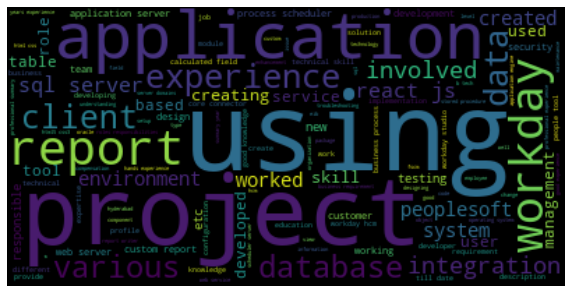

In [53]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
x_train,x_test,y_train,y_test = train_test_split(df['Extracted'], df.Extracted, test_size=0.2, random_state=10)

# Logistic Regression Classifier

In [57]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression(solver='lbfgs',random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 60.53%


In [58]:
print(classification_report(y_test, prediction))

# Support Vector Classifier

In [59]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC(random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 86.84%


In [60]:
print(classification_report(y_test, prediction))

# Multinomial Naive Bayes Classifier

In [61]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 47.37%


# Bernoulli Naive Bayes Classifier

In [62]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 81.58%


In [63]:
print(classification_report(y_test, prediction))

# Decision Tree

In [64]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 7, 
                                           splitter='best', 
                                           random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.47%


In [65]:
print(classification_report(y_test, prediction))

# Random Forest Classifier

In [66]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, max_features=7, criterion="entropy",random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.47%


# XG Boost

In [67]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

[19:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 76.32%


# Stochastic Gradient Descent

In [69]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier(random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.47%


# Gradient Boost Classifier

In [70]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=7))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.47%


In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier', 'Support Vector Classifier', 'Multinomial Naive Bayes Classifier', 
              'Bernoulli Naive Bayes Classifier', 'XGBoost Classifier', 'Decision Tree', 'Random Forest Classifier','Gradient Boost Classifier','Stochastic Gradient Descent' ],
    'Score': [60.53,86.84,47.37,81.58,89.47,89.47,76.32,89,90]})
models.sort_values(by=['Score'], axis=0, ascending=False, kind='quicksort')

,Model,Score
8,Stochastic Gradient Descent,90.00
4,XGBoost Classifier,89.47
5,Decision Tree,89.47
7,Gradient Boost Classifier,89.00
1,Support Vector Classifier,86.84
3,Bernoulli Naive Bayes Classifier,81.58
6,Random Forest Classifier,76.32
0,Logistic Regression Classifier,60.53
2,Multinomial Naive Bayes Classifier,47.37


In [ ]:
````